# 스타트업 지도 그려보기
목적 : 스타트업 설명으로 도메인을 묶어보자

*Table of Contents* 
1. 필요한 정보 크롤링하기
2. 수집한 정보 살펴보기
3. 결론

### 1. 필요한 정보 크롤링하기
필요한 것 : 스타트업 이름, url, url 내의 설명 텍스트

In [10]:
from selenium import webdriver
from bs4 import BeautifulSoup
import re
import time
import pandas as pd
import numpy as np

In [4]:
options = webdriver.ChromeOptions()
options.add_argument('headless')
options.add_argument('window-size=1920x1080')
options.add_argument("disable-gpu")

driver = webdriver.Chrome('/Users/hanbyeol/Downloads/chromedriver', options=options)

In [293]:
startup_dataframe = pd.DataFrame(columns=['company', 'url', 'description'])
driver = webdriver.Chrome('/Users/hanbyeol/Downloads/chromedriver', options=options)

In [294]:
num = 1

while num <= 3559:
    print(num)

    driver.get('https://www.rocketpunch.com/companies?page='+str(num)+'&sort=recent')
    driver.implicitly_wait(2)
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')

    company = soup.find_all("h4", class_="header name")
    link = soup.find_all("a", href=re.compile(r'^\/companies\/[ A-Za-z0-9_-]*$'))
    description = soup.find_all('div', 'description')

    company_list = []
    for com in company:
        company_list.append(com.find("strong").text)
    link_list = []
    for lnk in link:
        link_list.append(lnk.get('href'))
    desc_list = []
    for desc in description:
        desc_list.append(desc.text)

    temp = pd.DataFrame(
        {'company': company_list,
         'url': link_list,
         'description': desc_list})

    startup_dataframe = startup_dataframe.append(temp, ignore_index = True)
    num +=1
    time.sleep(5)

driver.quit()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [295]:
startup_dataframe.head()

,company,url,description
0,펍지 주식회사,/companies/peobji-jusighoesa,
1,사운드짐,/companies/soundgym,"오디오 피트니스 서비스, 사운드짐"
2,앤드어스,/companies/aendeueoseu,
3,굿셀코리아,/companies/gusselkoria,
4,씨케이다,/companies/ssikeida,


In [297]:
startup_dataframe.to_csv('startup_list.csv')

In [26]:
startup_dataframe = pd.read_csv('startup_list.csv')

In [10]:
startup_description = pd.DataFrame(columns=['url', 'description'])

### 상세 설명 크롤링하기

In [38]:
for url in startup_dataframe['url'][4055:]:
    try:
        print(url)
        driver.get('https://www.rocketpunch.com'+url)
        driver.implicitly_wait(4)
        html = driver.page_source
        soup = BeautifulSoup(html, 'lxml')

        full_description = soup.find_all("span", class_="hide full-text")

        text_list = []
        for text in full_description:
            text_list.append(text.text)

        temp = pd.DataFrame(
            {'url': url,
             'description': text_list})

        startup_description = startup_description.append(temp, ignore_index = True)
        time.sleep(3)
    except:
        startup_description.to_csv('description.csv')
driver.quit()

/companies/dreamskinkoreacorp
/companies/imrc_kist
/companies/kipeo
/companies/socialmobile
/companies/blacktime
/companies/starcatch
/companies/cashpang
/companies/opencloset
/companies/weontuweeo
/companies/koreapartnersgroup-1
/companies/enercamp
/companies/aleksia
/companies/jusighoesa-diwai
/companies/worktake
/companies/kisston
/companies/smartwine
/companies/bracketdby
/companies/dshimetal
/companies/ideaaudition
/companies/entropylab
/companies/stumcreation
/companies/rainmakerslab
/companies/22ndcenturymedia
/companies/golab
/companies/enedu
/companies/jeoyo
/companies/dreamplusproduction
/companies/hncgames
/companies/jj-soft
/companies/trendphile
/companies/eibeorideniseun-koria
/companies/jaegyueoraendeurobeokoria
/companies/ktinvestment
/companies/m-secure
/companies/hoy-1
/companies/eliocompany
/companies/aegsyeonpeurenjeu
/companies/seutaenpodeu-hotel
/companies/withatti
/companies/uzumarket-1
/companies/mediaz
/companies/meetoonline
/companies/3d-systems
/companies/wand

In [136]:
# 스타트업 데이터프레임의 missing value 비율
# 대부분 스타트업 설명이 없음.
# 회사명 없는 경우도 있음(모순)
startup_dataframe.isnull().sum()/startup_dataframe.shape

company        0.000057
url            0.000000
description    0.783967
dtype: float64

In [149]:
# 절대수 확인
startup_dataframe.isnull().sum()

company            4
url                0
description    55301
dtype: int64

In [27]:
# url을 찍어보면 무의미한 기업들임. 기업명이 ????이거나 null이어서 삭제해도 무방
startup_dataframe[startup_dataframe['company'].isnull() == True]

,Unnamed: 0,company,url,description
2911,2911,NaN,/companies/n-a,NaN
14886,14886,NaN,/companies/n-a-1,NaN
63570,63570,NaN,/companies/na-108,3년내 Exit 목표
66726,66726,NaN,/companies/null-1,NaN


In [32]:
# 스타트업 설명이 있는 경우
startup_notnull = startup_dataframe[startup_dataframe['description'].notnull()]

In [34]:
# 상세 설명 길이 세기
startup_notnull['length'] = startup_notnull['description'].map(str).apply(len)

/Users/hanbyeol/anaconda3/envs/text/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
startup_notnull.head()

,Unnamed: 0,company,url,description,length
1,1,사운드짐,/companies/soundgym,"오디오 피트니스 서비스, 사운드짐",18
6,6,더비타,/companies/thevita,Data-driven Lifecare Solution Platform,38
14,14,포씨아,/companies/searp,디지털 이미지 직거래 보상 플랫폼,18
19,19,자이,/companies/jaee-1,delivery compnay,16
23,23,이섭인더스트리,/companies/esupindustry-1,블록체인과 가상 회선 연결을 활용한 기술로 소비자에게 더 나은 인터넷 경험의 제공을...,62


In [68]:
# 상세 설명 히스토그램
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

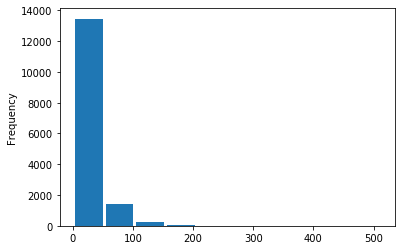

In [39]:
startup_notnull['length'].plot.hist(grid=False, rwidth=0.9)

In [186]:
startup_notnull['length'].describe()

count    15239.000000
mean        32.068443
std         28.037887
min          1.000000
25%         17.000000
50%         26.000000
75%         39.000000
max        512.000000
Name: length, dtype: float64

In [41]:
startup_description.head(10)

,url,description
0,/companies/soundgym,사운드짐은 빠르게 성장하고 있는 모바일 피트니스 시장에서 오디오 기반의 피트니스서비...
1,/companies/thevita,더비타는 블록체인 기반 라이프케어 회사입니다.건강에 필요한 좋은 습관을 통해 개인이...
2,/companies/searp,온디맨드 콘텐츠 미디어 플랫폼디지털 콘텐츠 거래 시장 시스템의 올바른 정착을 위한 ...
3,/companies/jusighoesa-maipateuneoseugeurub,"마이파트너스그룹은 다양한 연예매니지먼트사와 연예인IP를 활용해 음악, 영화, 콘텐츠..."
4,/companies/seeso,"아웃소싱을 넘어서, 미래의 ‘일’을 만듭니다. 회사가 아니어도 ‘일’을 할 수 있는..."
5,/companies/ogq,"OGQ는 소셜 크리에이터 플랫폼 기업입니다. OGQ 배경화면 HD(안드로이드, iO..."
6,/companies/bigone,"세계적인 플랫폼 회사로 성장할 일원이 되어 함께 발전해 나가고 싶은 자신감, 실력,..."
7,/companies/secondspace,"세컨드스페이스는 스타트업을 위한 개발/디자인 에이전시 입니다. 웹사이트, 모바일 앱..."
8,/companies/indentcorp,안녕하세요 인덴트코퍼레이션입니다.저희는 솔직한 리뷰가 더 좋은 제품으로 돌아온다고 ...
9,/companies/interiorgentleman,"상업공간만을 위한 인테리어 중개플랫폼,인테리어젠틀맨입니다.인젠맨은 다양한 사람이 모..."


In [40]:
startup_description.to_csv('description.csv')

In [13]:
startup_description.head()

,Unnamed: 0,url,description
0,0,/companies/soundgym,사운드짐은 빠르게 성장하고 있는 모바일 피트니스 시장에서 오디오 기반의 피트니스서비...
1,1,/companies/thevita,더비타는 블록체인 기반 라이프케어 회사입니다.건강에 필요한 좋은 습관을 통해 개인이...
2,2,/companies/searp,온디맨드 콘텐츠 미디어 플랫폼디지털 콘텐츠 거래 시장 시스템의 올바른 정착을 위한 ...
3,3,/companies/jusighoesa-maipateuneoseugeurub,"마이파트너스그룹은 다양한 연예매니지먼트사와 연예인IP를 활용해 음악, 영화, 콘텐츠..."
4,4,/companies/seeso,"아웃소싱을 넘어서, 미래의 ‘일’을 만듭니다. 회사가 아니어도 ‘일’을 할 수 있는..."


In [40]:
startup_description.shape

(5653, 3)

In [41]:
startup_description['length'] = startup_description['description'].map(str).apply(len)

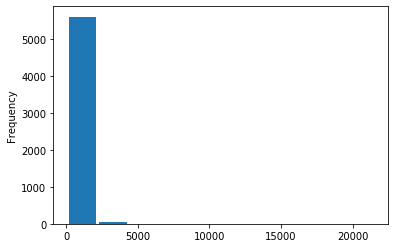

In [43]:
startup_description['length'].plot.hist(grid=False, rwidth=0.9)

In [44]:
startup_description['length'].describe()

count     5653.000000
mean       501.996285
std        497.887818
min         48.000000
25%        258.000000
50%        370.000000
75%        587.000000
max      21525.000000
Name: length, dtype: float64

간단 설명만으로는 15,000여건 상세 설명이 있는 스타트업은 5,653건
간단 설명의 평균은 가장 짧게는 1자 가장 길게는 자 작성함
상세 설명은 평균적으로 501자 작성 되었고 가장 짧은 게 48자, 가장 긴 것이 21525자

In [84]:
check = startup_description[startup_description['length'] == 21525]

In [85]:
print(check)

      Unnamed: 0              url  \
5292        5292  /companies/miho   

                                            description  length  
5292  <p style="margin-top: 3.6pt; margin-bottom: 0p...   21525  


실제로 상세 설명이 이상하게 들어가 있는 기업임